Week 4 – Comparing Device Mix and Activity Categories Across Demographics


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- Load Data ----------------
data = pd.read_csv("/content/Indian_Kids_Screen_Time.csv")

# Set style
sns.set(style="whitegrid")

In [87]:
# Ensure Age_Band ordering (adjust to match dataset if different)
age_order = ["8-10", "11-12", "13-15", "16-18"]

def age_to_band(age):
    if 8 <= age <= 10:
        return "8-10"
    elif 11 <= age <= 12:
        return "11-12"
    elif 13 <= age <= 15:
        return "13-15"
    elif 16 <= age <= 18:
        return "16-18"
    else:
        return None

data['Age_Band'] = data['Age'].apply(age_to_band)
data['Age_Band'] = pd.Categorical(data['Age_Band'], categories=age_order, ordered=True)

display(data.head())

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,13-15
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,11-12
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,16-18
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,13-15
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,11-12


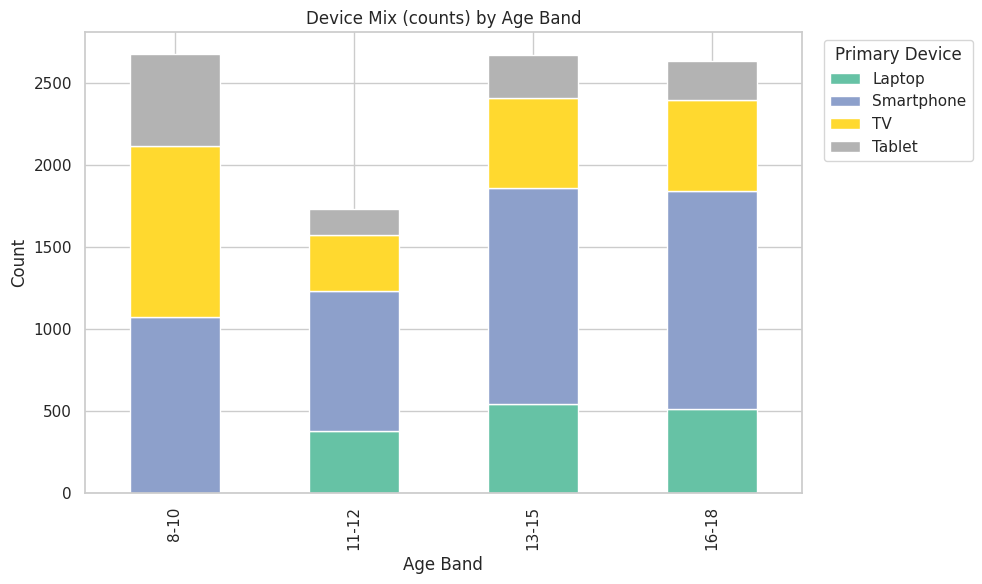

In [88]:
# 1 Device mix: stacked bar by Age Band (counts)
device_by_age = pd.crosstab(data['Age_Band'], data['Primary_Device']).reindex(age_order)
device_by_age.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Device Mix (counts) by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Count")
plt.legend(title="Primary Device", bbox_to_anchor=(1.02,1))
plt.tight_layout()
plt.show()


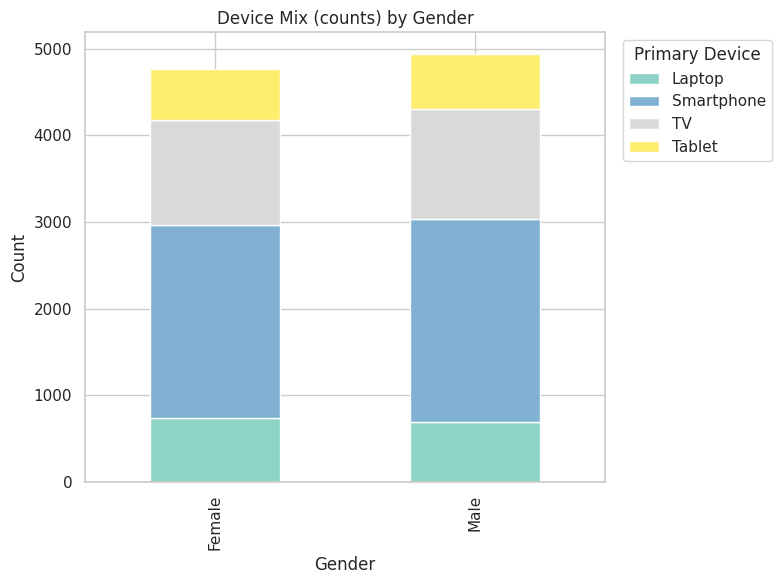

In [89]:
# 2 Device mix: stacked bar by Gender (counts)
device_by_gender = pd.crosstab(data['Gender'], data['Primary_Device'])
device_by_gender.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Set3')
plt.title("Device Mix (counts) by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Primary Device", bbox_to_anchor=(1.02,1))
plt.tight_layout()
plt.show()

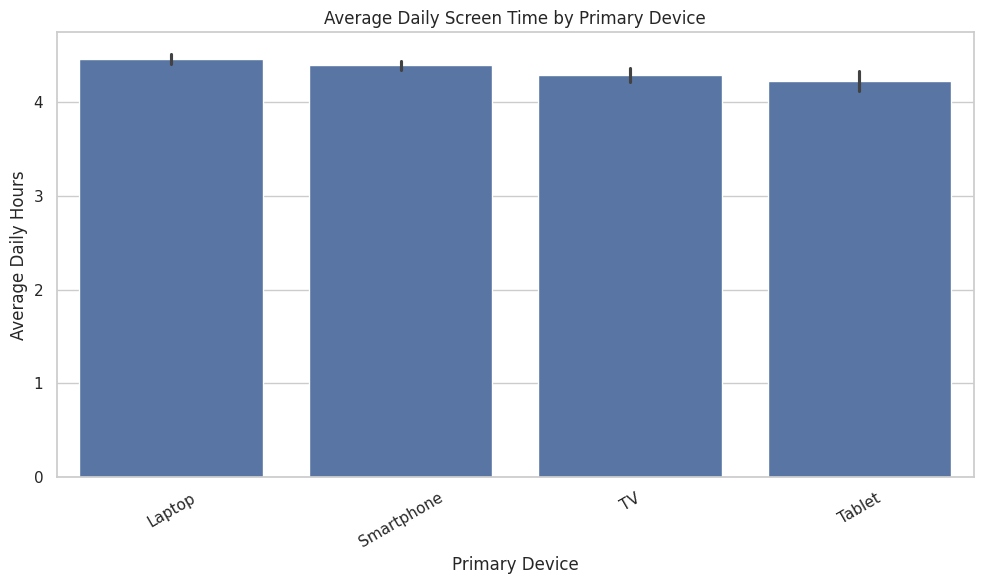

In [90]:
# 3 Device mix: bar chart (average screentime by device)
plt.figure(figsize=(10,6))
order = data.groupby('Primary_Device', observed=False)['Avg_Daily_Screen_Time_hr'].mean().sort_values(ascending=False).index
sns.barplot(data=data, x='Primary_Device', y='Avg_Daily_Screen_Time_hr', order=order, estimator='mean')
plt.title("Average Daily Screen Time by Primary Device")
plt.xlabel("Primary Device")
plt.ylabel("Average Daily Hours")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


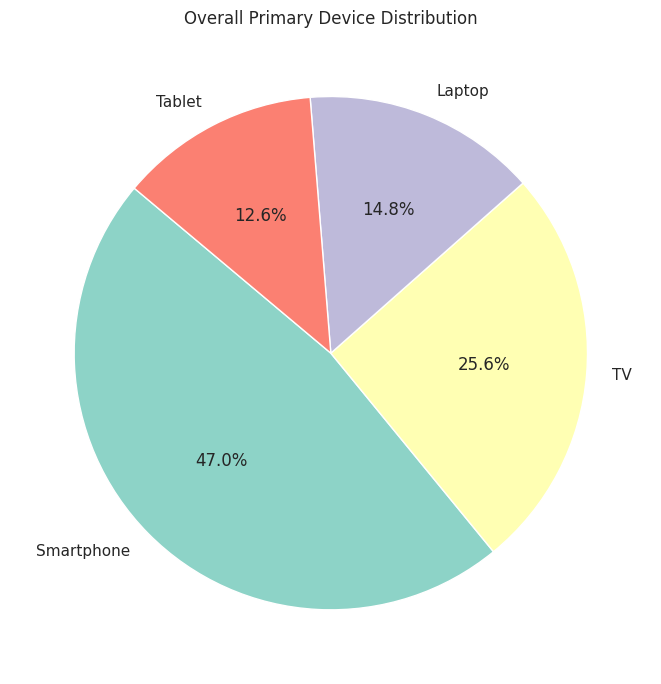

In [91]:
# 4 Pie chart: overall device usage distribution
device_counts = data['Primary_Device'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("Set3", len(device_counts)))
plt.title("Overall Primary Device Distribution")
plt.tight_layout()
plt.show()

In [92]:
print(data.columns)

Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural', 'Age_Band'],
      dtype='object')


/tmp/ipython-input-152581032.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = data.pivot_table(


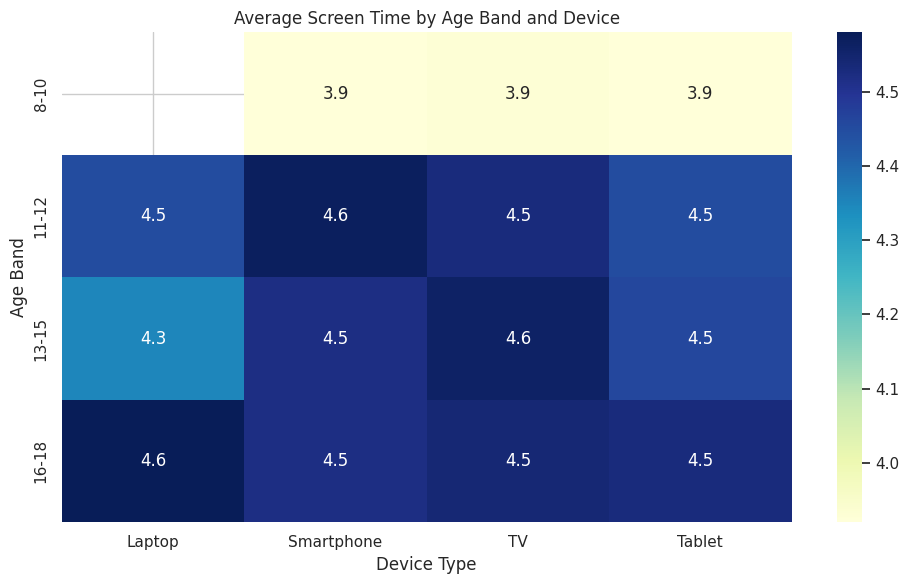

In [93]:
# 5 Activity categories heatmap: Age Band x Activity Category (mean screentime)

# Create pivot table for the heatmap
heatmap_data = data.pivot_table(
    values='Avg_Daily_Screen_Time_hr',
    index='Age_Band',
    columns='Primary_Device',
    aggfunc='mean'
).round(2)

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Average Screen Time by Age Band and Device')
plt.xlabel('Device Type')
plt.ylabel('Age Band')
plt.tight_layout()
plt.show()


/tmp/ipython-input-2113584486.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_hours = data.groupby("Age_Band")['Avg_Daily_Screen_Time_hr'].mean().reset_index()


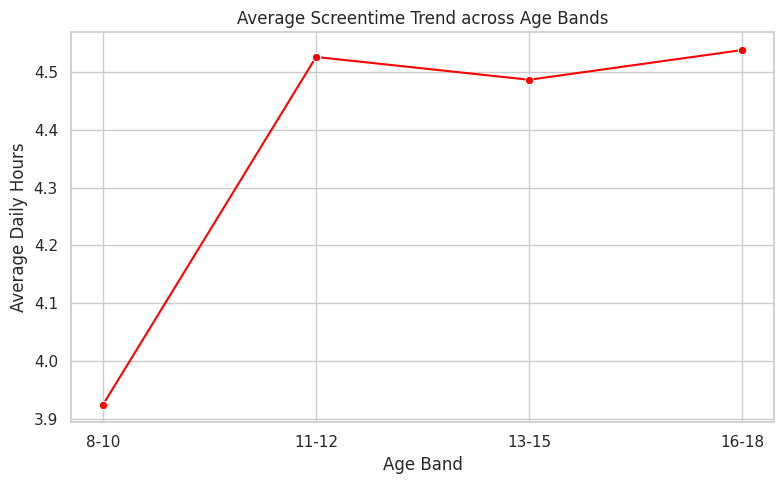

In [94]:
# 6 Line Plot – Screentime Trend across Age Bands
age_hours = data.groupby("Age_Band")['Avg_Daily_Screen_Time_hr'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(data=age_hours, x="Age_Band", y="Avg_Daily_Screen_Time_hr", marker="o", color="red")
plt.title("Average Screentime Trend across Age Bands")
plt.xlabel("Age Band")
plt.ylabel("Average Daily Hours")
plt.tight_layout()
plt.show()


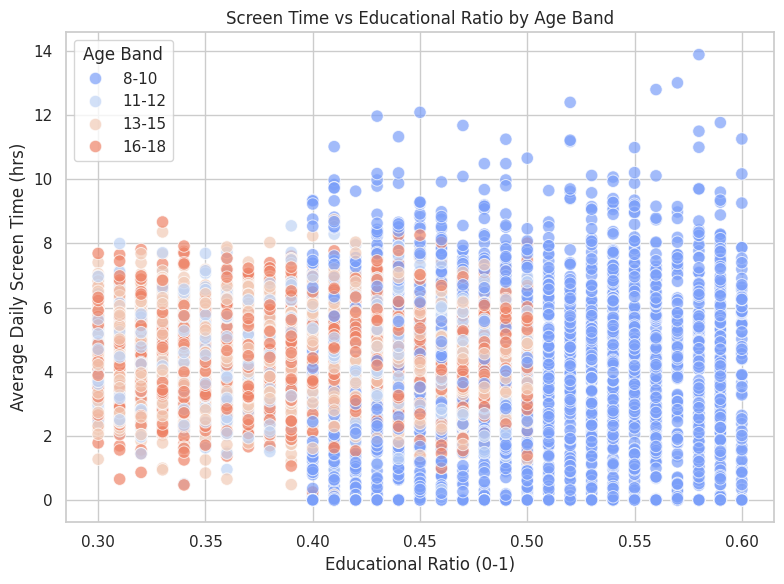

In [106]:
# 7 Scatter plot - Screen Time vs Educational Ratio, colored by Age Band

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=data,
    x='Educational_to_Recreational_Ratio',
    y='Avg_Daily_Screen_Time_hr',
    hue='Age_Band',
    palette='coolwarm',
    s=80,
    alpha=0.7
)
plt.title('Screen Time vs Educational Ratio by Age Band')
plt.xlabel('Educational Ratio (0-1)')
plt.ylabel('Average Daily Screen Time (hrs)')
plt.legend(title='Age Band')
plt.tight_layout()
plt.show()

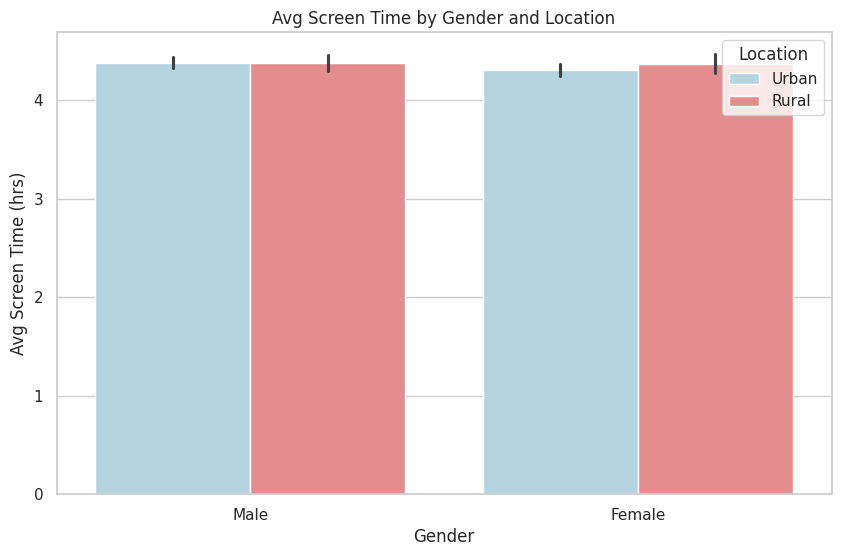

In [105]:
# 8 Bar chart - Average Screen Time by Gender and Urban/Rural

plt.figure(figsize=(10,6))
location_colors = {'Urban': 'lightblue', 'Rural': 'lightcoral'}
sns.barplot(data=data, x='Gender', y='Avg_Daily_Screen_Time_hr', hue='Urban_or_Rural', palette=location_colors)
plt.title('Avg Screen Time by Gender and Location')
plt.xlabel('Gender')
plt.ylabel('Avg Screen Time (hrs)')
plt.legend(title='Location')
plt.show()

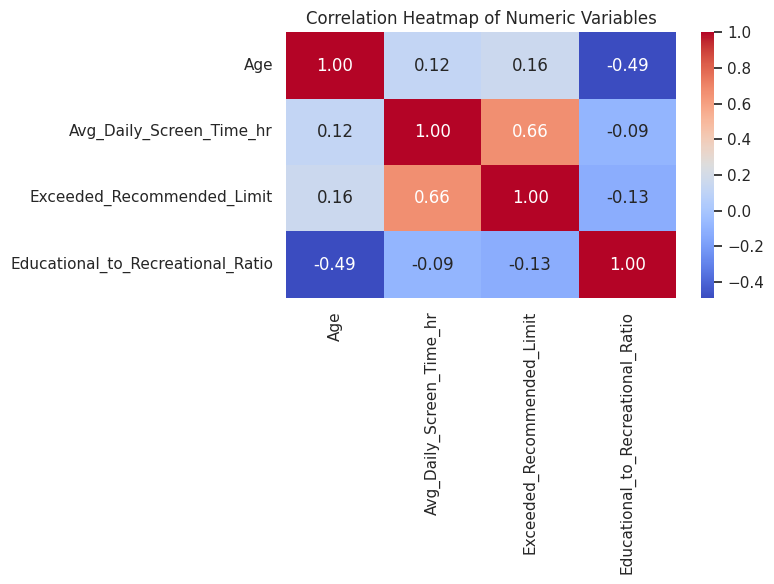

In [104]:
# 9 Correlation Heatmap – Numeric Variables

plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Variables")
plt.tight_layout()
plt.show()

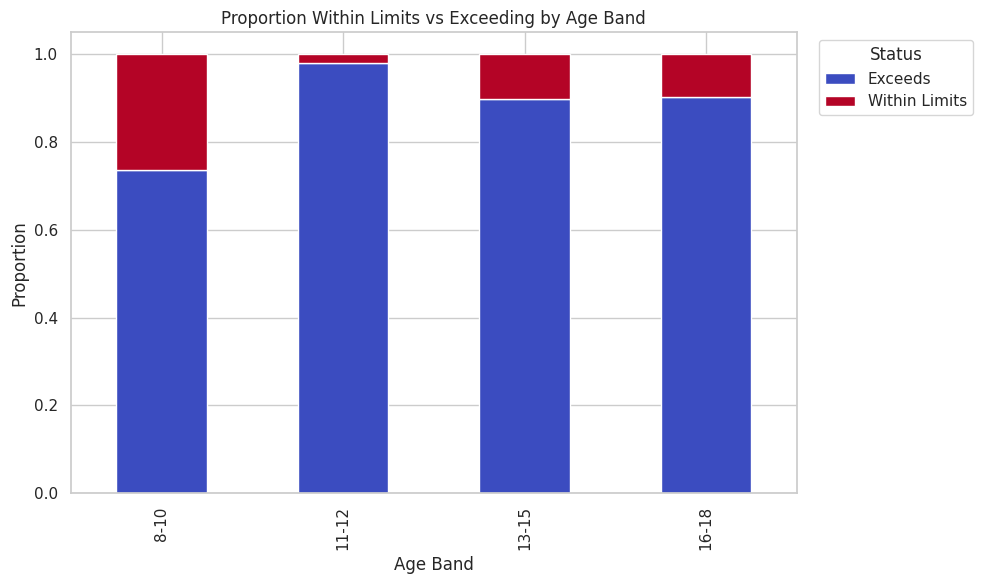

In [103]:
# 10  Proportion exceeding recommended limits by Age Band (stacked proportion)
map_exceed = {
    'No Harm': 'Within Limits',
    'Attention Needed': 'Exceeds',
    'High Risk': 'Exceeds'
}
if 'Screentime_Category' in data.columns:
    prop_df = pd.crosstab(data['Age_Band'], data['Screentime_Category']).reindex(age_order).fillna(0)
    # If categories aren't exactly 'No Harm' etc., fallback to threshold-based split:
    if not set(prop_df.columns).intersection(set(map_exceed.keys())):
        # fallback: compute exceeds based on threshold = 2 hours for under-13, 3 hours otherwise (example)
        def exceeds(row):
            thr = 2 if row['Age_Band'] in ['8-10','11-12'] else 3
            return 'Exceeds' if row['Avg_Daily_Screen_Time_hr'] > thr else 'Within Limits'
        data['Exceed_Flag'] = data.apply(exceeds, axis=1)
        prop = pd.crosstab(data['Age_Band'], data['Exceed_Flag']).reindex(age_order).fillna(0)
    else:
        # map categories to Within/Exceeds
        temp = data.copy()
        temp['Exceed_Flag'] = temp['Screentime_Category'].map(map_exceed).fillna('Exceeds')
        prop = pd.crosstab(temp['Age_Band'], temp['Exceed_Flag']).reindex(age_order).fillna(0)
else:
    # fallback threshold if Screentime_Category not present
    def exceeds(row):
        thr = 2 if row['Age_Band'] in ['8-10','11-12'] else 3
        return 'Exceeds' if row['Avg_Daily_Screen_Time_hr'] > thr else 'Within Limits'
    data['Exceed_Flag'] = data.apply(exceeds, axis=1)
    prop = pd.crosstab(data['Age_Band'], data['Exceed_Flag']).reindex(age_order).fillna(0)

# Convert counts to proportions
prop_pct = prop.div(prop.sum(axis=1), axis=0)
prop_pct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title("Proportion Within Limits vs Exceeding by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Proportion")
plt.legend(title="Status", bbox_to_anchor=(1.02,1))
plt.tight_layout()
plt.show()


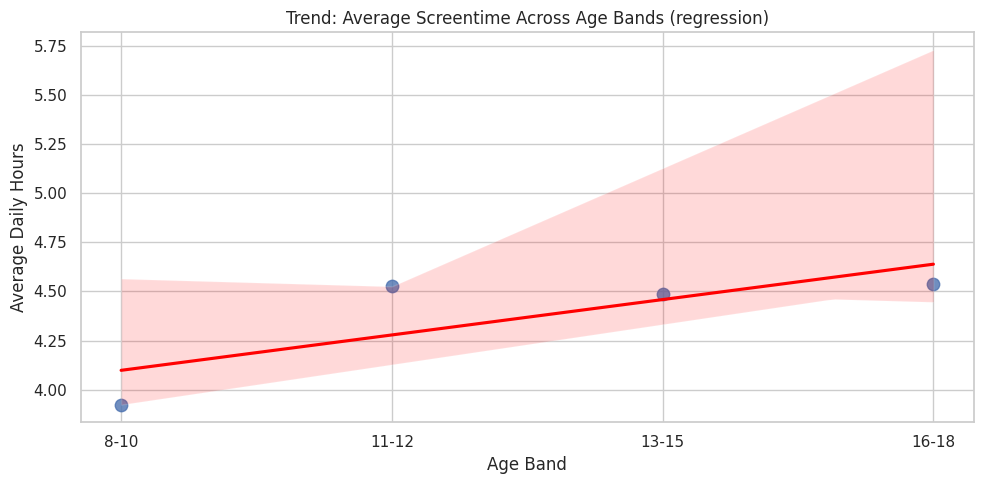

In [102]:
# 11 Trend: average screentime across age bands with regression (single line)
age_hours = data.groupby("Age_Band", observed=False)['Avg_Daily_Screen_Time_hr'].mean().reindex(age_order).reset_index()
plt.figure(figsize=(10,5))
sns.regplot(
    x=np.arange(len(age_hours)),  # use numeric x to ensure regression fits sensibly
    y='Avg_Daily_Screen_Time_hr',
    data=age_hours,
    marker='o',
    scatter_kws={'s':80},
    line_kws={'color':'red'}
)
plt.xticks(np.arange(len(age_hours)), age_hours['Age_Band'])
plt.title("Trend: Average Screentime Across Age Bands (regression)")
plt.xlabel("Age Band")
plt.ylabel("Average Daily Hours")
plt.tight_layout()
plt.show()

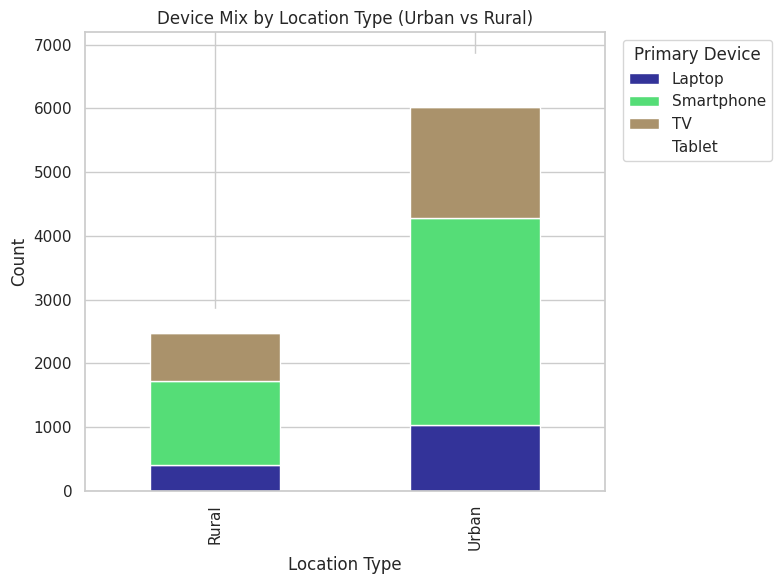

In [101]:
# 12 Device mix by Location (stacked)
device_by_location = pd.crosstab(data['Urban_or_Rural'], data['Primary_Device'])
device_by_location.plot(kind='bar', stacked=True, figsize=(8,6), colormap='terrain')
plt.title("Device Mix by Location Type (Urban vs Rural)")
plt.xlabel("Location Type")
plt.ylabel("Count")
plt.legend(title="Primary Device", bbox_to_anchor=(1.02,1))
plt.tight_layout()
plt.show()

Observations from Visuals

1. Teenagers and late-teens spend the most time on screens daily, with both boys and girls exceeding recommended limits; in younger age groups, girls use screens slightly more.

2. Smartphones are the most commonly used device, followed by laptops, while TVs and tablets are much less popular.

3. The most reported health issues are poor sleep and eye strain, with anxiety and obesity less frequent but still present.

4. Most pre-teens and teenagers exceed recommended screen time, with very few younger children staying within healthy limits.

5. Recreational screen use far exceeds educational use across all age groups; only a small number of children have balanced or education-focused usage.

6. Urban students are more numerous than rural ones and generally have higher screen exposure.

7. Many students fall into the “Attention Needed” category, while very few are in the “No Harm” zone, especially among teens.

8. A clear upward trend shows that average daily screen time increases with age, confirmed by regression analysis.

9. Screen time is similar between pre-teen boys and girls, but a gap emerges and widens with age.

10. Among late-teens, males have higher median screen time and greater variability, indicating that screen habits diverge between genders as children grow older.